In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con
from scipy import integrate

z_arr = np.linspace(0,20,1000)
ndot_ion = 3E+50 / 3.0857E+22
mass_H   = 1.67262192E-27
clump_H = 3

# Open files (not needed for first stage of solving equation)

In [6]:
# Format file name to have 3 decimal places
base = './planck1_20_1024_cold/'
file  = base+'los2048_n5000_z{0:.3f}.dat'.format(6.0)

# Open the binary file
readdata = open(file,"rb")

# Header data
ztime  = np.fromfile(readdata,dtype=np.double,count=1) # redshift
omegaM = np.fromfile(readdata,dtype=np.double,count=1) # Omega_m (matter density)
omegaL = np.fromfile(readdata,dtype=np.double,count=1) # Omega_L (Lambda density)
omegab = np.fromfile(readdata,dtype=np.double,count=1) # Omega_b (baryon density)
h100   = np.fromfile(readdata,dtype=np.double,count=1) # Hubble constant, H0 / 100 km/s/Mpc
box100 = np.fromfile(readdata,dtype=np.double,count=1) # Box size in comoving kpc/h
Xh     = np.fromfile(readdata,dtype=np.double,count=1) # Hydrogen fraction by mass
nbins  = np.fromfile(readdata,dtype=np.int32,count=1)  # Number of pixels in each line of sight
numlos = np.fromfile(readdata,dtype=np.int32,count=1)  # Number of lines of sight

# Line of sight locations in box 
iaxis  = np.fromfile(readdata,dtype=np.int32,count=numlos[0])  # projection axis, x=1, y=2, z=3
xaxis  = np.fromfile(readdata,dtype=np.double,count=numlos[0]) # x-coordinate in comoving kpc/h
yaxis  = np.fromfile(readdata,dtype=np.double,count=numlos[0]) # y-coordinate in comoving kpc/h
zaxis  = np.fromfile(readdata,dtype=np.double,count=numlos[0]) # z-coordinate in comoving kpc/h

# Line of sight scale
posaxis = np.fromfile(readdata,dtype=np.double,count=nbins[0]) # comoving kpc/h
velaxis = np.fromfile(readdata,dtype=np.double,count=nbins[0]) # km/s

# Gas density, rho/<rho>
density = np.fromfile(readdata,dtype=np.double,count=nbins[0]*numlos[0])

# H1 fraction, fH1 = nH1/nH
H1frac  = np.fromfile(readdata,dtype=np.double,count=nbins[0]*numlos[0])

# Temperature, K
temp    = np.fromfile(readdata,dtype=np.double,count=nbins[0]*numlos[0])

# Peculiar velocity, km/s
vpec    = np.fromfile(readdata,dtype=np.double,count=nbins[0]*numlos[0])

# Close the binary file
readdata.close()

print("omegaB:", omegab[0])
print("omegaL:", omegaL[0])
print("omegaM:", omegaM[0]) 

omegaB: 0.0482
omegaL: 0.692
omegaM: 0.308


# Without data

/var/folders/1x/64pv25ds1wz9f75cf36bnkw00000gn/T/ipykernel_60386/1646211536.py:28: RuntimeWarning: invalid value encountered in sqrt
  def hubble(z): return H0 * np.sqrt(omegaM * (1 + z)**3 + omegaL)


Text(0, 0.5, '$Q(z)$')

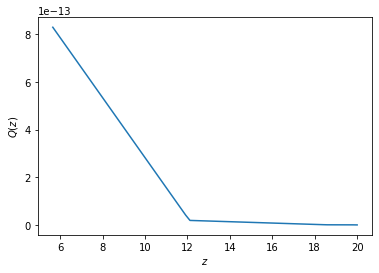

In [2]:
# x axis
z_arr = np.linspace(20, 0, 100)

# 1 MPc in metres
MPc = 3.0857E+22

# Define constants. Some are taken from the simulations
ndot_ion = 3E+50 / MPc**3
mass_H   = 1.67262192E-27
clump_H = 3
Xh = 0.76
Yhe = 1 - Xh
temp = 1E4
H0 = 67.5 * 1000 / MPc

omegab = 0.0482
omegaL = 0.692
omegaM = 0.308

# Now we can calculate the quantities needed for the equation
# Calculate alpha 
a = 7.982e-11; b = 0.7480; T0 = 3.148; T1=7.036e5; T = 1e4
alpha = a*(np.sqrt(T/T0) * (1 + np.sqrt(T/T0))**(1-b) * (1 + np.sqrt(T/T1))**(1+b))**-1

# These quantities vary with z so I've made functions for each of them
def n_avg(z):  return (3 * H0*H0 / (8 * np.pi * con.G)) * omegab * Xh * (1+z)**3 / mass_H
def t_rec(z):  return ((clump_H * alpha * n_avg(z)) * (1 + z)**3 * (1 + Yhe / (4*Xh)))**-1
def hubble(z): return H0 * np.sqrt(omegaM * (1 + z)**3 + omegaL)

# This takes Q and z and gives a value of dQ/dz
def diff_eqn(Q, z): 
    return (Q / t_rec(z) - ndot_ion / n_avg(z)) / (hubble(z) * (1+z))

y0 = 0
Q = integrate.odeint(diff_eqn, y0, z_arr)
plt.plot(z_arr, Q)
plt.xlabel('$z$')
plt.ylabel('$Q(z)$')

# TODO: try solving it using forward Euler/forward difference method

Plot dQ/dz

/Users/samgabe/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Text(0, 0.5, '$Q(z)$')

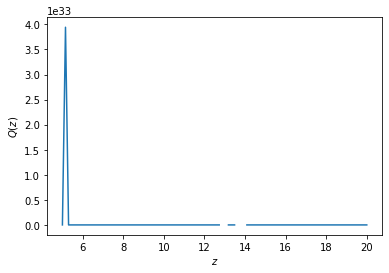

In [31]:
# x axis
z_arr = np.linspace(5, 20, 100)

# 1 MPc in metres
MPc = 3.0857E+22

# Define constants. Some are taken from the simulations
ndot_ion = 3E+50 / MPc**3
mass_H   = 1.67262192E-27
clump_H = 3
Xh = 0.76
Yhe = 1 - Xh
temp = 1E4
H0 = 67.5 * 1000 / MPc

omegab = 0.0482
omegaL = 0.692
omegaM = 0.308

# Now we can calculate the quantities needed for the equation
# Calculate alpha 
a = 7.982e-11; b = 0.7480; T0 = 3.148; T1=7.036e5; T = 1e4
alpha = a*(np.sqrt(T/T0) * (1 + np.sqrt(T/T0))**(1-b) * (1 + np.sqrt(T/T1))**(1+b))**-1

# These quantities vary with z so I've made functions for each of them
def n_avg(z):  return (3 * H0*H0 / (8 * np.pi * con.G)) * omegab * Xh * (1+z)**3 / mass_H
def t_rec(z):  return ((clump_H * alpha * n_avg(z)) * (1 + z)**3 * (1 + Yhe / 4*Xh))**-1
def hubble(z): return H0 * np.sqrt(omegaM * (1 + z)**3 + omegaL)

# This takes Q and z and gives a value of dQ/dz
def diff_eqn(Q, z): 
    return (Q / t_rec(z) - ndot_ion / n_avg(z)) / (hubble(z) * (1+z))

y0 = 1
Q = integrate.odeint(diff_eqn, y0, z_arr)
plt.plot(z_arr, Q)
plt.xlabel('$z$')
plt.ylabel('$Q(z)$')